In [2]:
import sys
import os
sys.path.append(os.path.abspath('.'))  # Добавляем текущую папку


In [3]:
from model.colorization_model import ColorizationNet


In [4]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms



In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ColorizationNet().to(device)
model.load_state_dict(torch.load('model\colorization_model.pth', map_location=device))
model.eval()

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\denis\AppData\Local\Temp\ipykernel_5044\3862597589.py:3: SyntaxWarning: invalid escape sequence '\c'
  model.load_state_dict(torch.load('model\colorization_model.pth', map_location=device))
C:\Users\denis\AppData\Local\Temp\ipykernel_5044\3862597589.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.ser

ColorizationNet(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): Sigmoid()
  )
)

In [6]:
transform_input = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((256,256)),
    transforms.ToTensor(),
])

In [10]:
def colorize_image(image_path, save_path=None):
    img = Image.open(image_path).convert('L')  # grayscale
    input_tensor = transform_input(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)  # [1, 3, H, W]

    output = output.squeeze(0).permute(1, 2, 0).cpu().numpy()  # [H, W, 3]

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title("Input (Grayscale)")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Colorized Output")
    plt.imshow(output)
    plt.axis('off')

    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Изображение сохранено: {save_path}")

    plt.show()


Изображение сохранено: examples\colorized_output.png


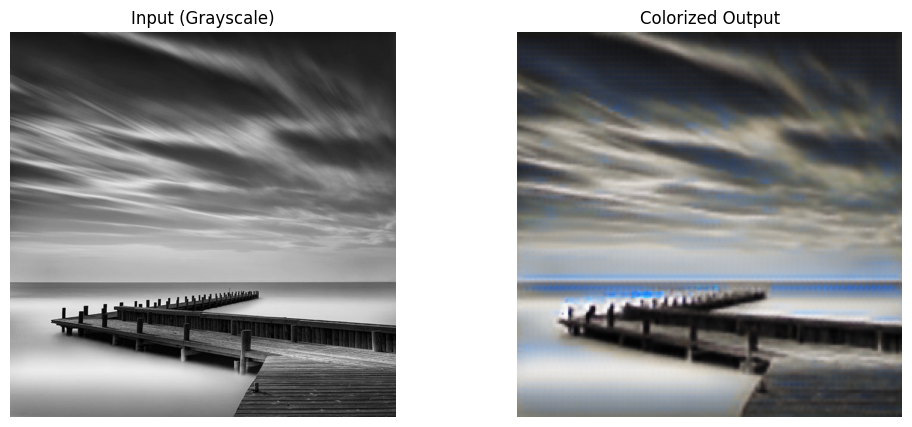

In [12]:
colorize_image(
    image_path='examples\\83afcf01582239614d34d44df133aef1.jpg',
    save_path='examples\\colorized_output.png'
)